#Actividad evaluable: Mapas de calor y boxplots

1.- Importamos todas las librerias a utilizar


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!pip install category_encoders
from category_encoders import OrdinalEncoder

2.- Definimos nuestro DF para analizar la estructura visualmente y las variables a analizar

In [ ]:
df = pd.read_csv('MST_PRESENTTAX.csv')
df.head()

,PTAXID,COMPANYID,BRANCHID,CLIENTID,DATE,VAT,INCOMETAX,DELETESTATUS,CREATEDBY,CREATEDDATETIME,MODIFIEDBY,MODIFIEDDATETIME
0,1,1000,1,2,2017-11-30 00:00:00,0.0,0.0,False,1,2018-01-11 22:11:04.360000,NaN,NaN
1,2,1000,1,2,2017-12-31 00:00:00,923.0,1946.0,False,1,2018-01-19 01:22:51.193000,NaN,NaN
2,3,1000,1,4,2017-12-31 00:00:00,810.0,0.0,False,1,2018-01-19 17:28:26.827000,1.0,2018-02-07 11:05:21.360000
3,4,1000,1,3,2017-12-31 00:00:00,0.0,303.0,False,1,2018-01-20 03:35:28.150000,1.0,2018-01-22 23:26:35.610000
4,5,1000,1,21,2017-12-31 00:00:00,647.0,0.0,False,1,2018-01-20 03:55:35.613000,NaN,NaN


3.- A continuación se realizó una revisión de los datos presentes en las columnas para entender cúantos de los datos que contenían eran únicos (para saber su naturaleza, y así, su utilidad)


In [ ]:
df['COMPANYID'].unique()

array([1000])

In [ ]:
df['BRANCHID'].unique()

array([1])

In [ ]:
df['DELETESTATUS'].unique()

array([False])

In [ ]:
df['CREATEDBY'].unique()

array([  1,  41, 117,  48, 156, 180, 216])

4.-Se determinó que dichas columnas no eran de utilidad debido a que no contenían datos únicos, eran repetidos o simplemente no eran de significancia, por lo que a continuación se borran las variables que no tienen utilidad por que no queremos que hagan ruido en el análisis posterior, ni consuman recursos de manera innecesaria. 

In [ ]:
df.drop(['CREATEDBY', 'DELETESTATUS', 'BRANCHID', 'COMPANYID', 'MODIFIEDDATETIME', 'MODIFIEDBY'], axis = 1, inplace = True)

5.-A continuación realizamos un diagrama de cajas y bigotes para entender la dispersión y la concentración de datos en la variable de "PTAXID".

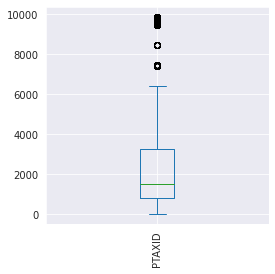

In [ ]:
df['PTAXID'].plot.box(figsize = (4,4), rot = 90)

Observamos que existen múltiples datos atípicos pero el rango principal oscila entre las 800 y 3000 unidades.

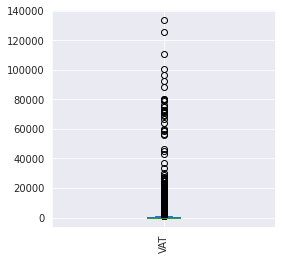

In [ ]:
df['VAT'].plot.box(figsize = (4,4), rot = 90)

De igual manera aquí observamos mayor cantidad de outliers, indicándonos un poco la naturaleza de la variable "VAT".

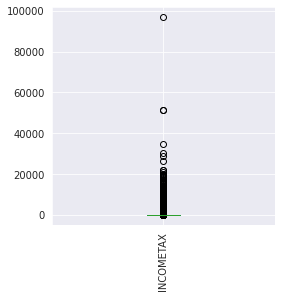

In [ ]:
df['INCOMETAX'].plot.box(figsize = (4,4), rot = 90)

Para finalizar observamos en la variable "Income Tax" todavía una mayor cantidad de outliers, por lo que concluímos que dichas (3)variables presentan una gran cantidad de datos fuera del rango y podrían hacer ruido en el analisis de composición, debido a que no tienen un rango similiar ni un rango intra-variable definido para establecer patrones, conexión o una correlación entre ellas. 

Continuando decidimos generar un HeatMap para entender la correlación existente entre las variables, para poder observar de manera instantena si existen dichos patrones de comportamiento que puedan deberse a otras variables. 

Text(0.5, 1.0, 'Correlation Map')

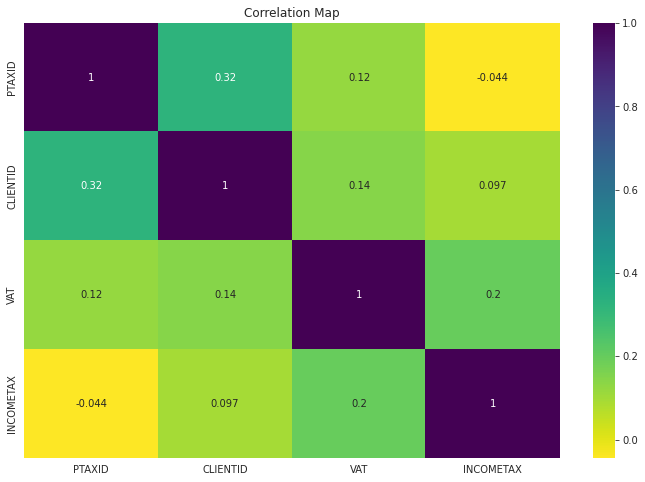

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'viridis_r')
plt.title('Correlation Map')

A manera de conclusión podemos afirmar que no hay correlaciones de significancia entre las variables restantes, debido principalmente a como lo anlaizamos de manera previa: Sus rangos no coinciden y tampoco se encuentran entre rangos definidos que pudieran aportar a una correlación ni positiva ni negativa. Las variables que más se acercan sin ser un resultado vinculante serían las de PTAXID con el CLIENTID y viceversa, siendo el único grupo de variables que al ser ID's tienen relación parcial de 0.3 debido al programa de asignación de códigos por cliente que los relaciona ligeramente con los de los clientes. 